In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("50_Startups.csv")


In [4]:
data.head()
## Here profit is our y values and all other are x values 

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data.info

<bound method DataFrame.info of     R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida

In [6]:
### First we will see correlation matrix
data.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


From the above we can see that R&D and profit have very strong colinear relation show this will create multicolinearity problem 
in the model . SO lets verify

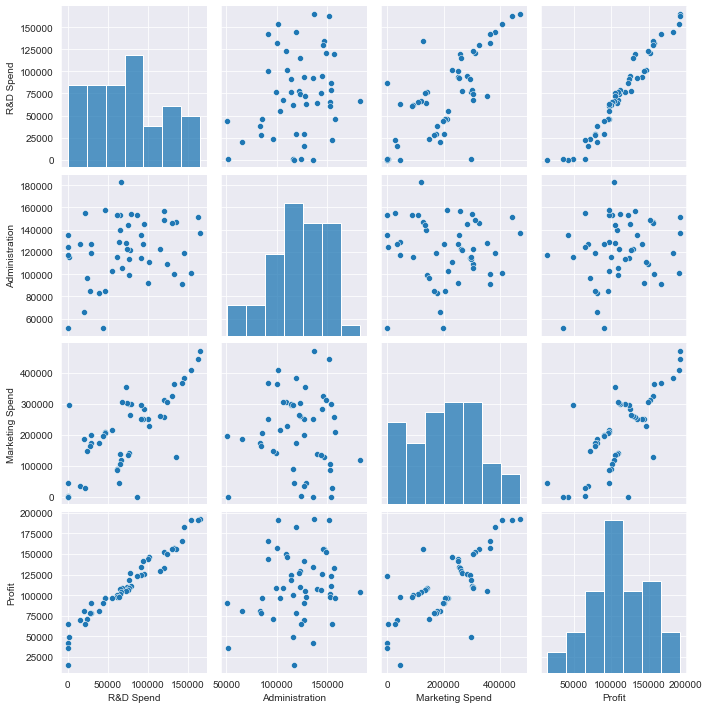

In [7]:
## Scatterplot between variables along with the histogram
## Format the plot background and scatter plot for all variables  USING seaborn 
sns.set_style(style="darkgrid")
sns.pairplot(data)


From the above plot  we can see that  R&D with profit linear relation so we can build model

## Preparing the Model

In [8]:
## Renaming column Marketing Spend as Marketing
ds=data.rename({'Marketing Spend':'Marketing','R&D Spend':'RD'},axis=1)
ds

,RD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [9]:
## Build Model using library
import statsmodels.formula.api as smf 
model=smf.ols('Profit~RD+Administration+Marketing', data=ds).fit()

In [10]:
model.summary()  ### R-squared is percentage of variation in profit explained by features space so it is greater than 0.85 so 
#it is indication of good modelbut P value of administration high means shows no contribution

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           4.53e-30
Time:                        12:12:27   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD                 0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
## Coefficients
model.params

Intercept         50122.192990
RD                    0.805715
Administration       -0.026816
Marketing             0.027228
dtype: float64

In [12]:
## p and t values
print(model.tvalues, '\n', model.pvalues)

Intercept          7.626218
RD                17.846374
Administration    -0.525507
Marketing          1.655077
dtype: float64 
 Intercept         1.057379e-09
RD                2.634968e-22
Administration    6.017551e-01
Marketing         1.047168e-01
dtype: float64


In [13]:
## R  squared values
(model.rsquared,model.rsquared_adj)


(0.9507459940683246, 0.9475337762901719)


### Simple linear regression
For verification purpose we are building SLR for Marketing and Administration because they have high P value in above model

In [14]:
ml_M=smf.ols('Profit~Marketing',data = ds).fit()
# t and p-values
print(ml_M.tvalues,'\n', ml_M.pvalues)
ml_M.summary()
### So here p value is extremly small which shows against null hypothesis means it makes contribution to predict profit 

Intercept    7.808356
Marketing    7.802657
dtype: float64 
 Intercept    4.294735e-10
Marketing    4.381073e-10
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           4.38e-10
Time:                        12:12:28   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing      0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
ml_Ad=smf.ols('Profit~Administration', data = ds).fit()
## t and p-values
print(ml_Ad.tvalues, '\n',ml_Ad.pvalues )
ml_Ad.summary()
### So here p value is extremly small which shows against null hypothesis means it makes contribution to predict profit

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 23 Mar 2022   Prob (F-statistic):              0.162
Time:                        12:12:28   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
ml_AdM=smf.ols('Profit~Administration+Marketing', data = ds).fit()
print(ml_AdM.tvalues, '\n',ml_AdM.pvalues )

Intercept         1.142741
Administration    2.467779
Marketing         8.281039
dtype: float64 
 Intercept         2.589341e-01
Administration    1.729198e-02
Marketing         9.727245e-11
dtype: float64


In [17]:
ml_AdM.summary()
## So here we can see p value of administration is not zero means when we build model taking marketing and administration do not make any contribution in prediction 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           2.50e-10
Time:                        12:12:28   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration     0.3237      0.131      2.468      0.017       0.060       0.588
Marketing          0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Calculating VIF

In [18]:
rsq_RD=smf.ols('RD~Administration+Marketing', data=ds).fit().rsquared
vif_RD=1/(1-rsq_RD)

rsq_Administration=smf.ols('Administration~RD+Marketing', data=ds).fit().rsquared
vif_Administration=1/(1-rsq_Administration)



rsq_Marketing=smf.ols('Marketing~Administration+RD', data=ds).fit().rsquared
vif_Marketing=1/(1-rsq_Marketing)


## Storing VIF values in  dataframe
d1 = {'Variables':['RD','Administration','Marketing'],'VIF':[vif_RD,vif_Administration,vif_Marketing]}
Vif_frame = pd.DataFrame(d1)
Vif_frame


,Variables,VIF
0,RD,2.468903
1,Administration,1.175091
2,Marketing,2.326773


## Residual Analysis

## ## Test for Normality of Residuals (Q-Q Plot)
###### Here we are  checking whether its normally distributed or not

In [19]:
model.resid.min()

-33533.7341112986

In [20]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

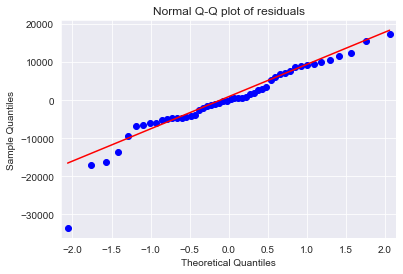

In [21]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()



### Here you can see above majority of data lie in the line for some lower values it has residual so 1st condition satisfied 
we have ND plot of residuals

In [22]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

## Residual Plot for Homoscedasticity

In [23]:
### Here we are standarizing error because earlier it was N(0,sigmasqure) but now we are coverted it to N(0,1)

def get_standardized_values( vals ):      
    return (vals - vals.mean())/vals.std()

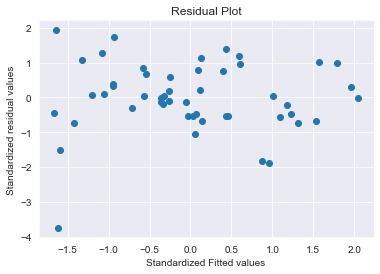

In [24]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Inference: Above plot doen't look like funnel if we draw a line from mean=0 so it homoscedasticity

## Residual Vs Regressors

## This conclusion is for the model we build 

SO here we are trying to find out the relation between residual and each x values but it not soo useful
from the below plots we can make conclusion that  from Marketing and Admisnistration and RD. Marketing and RD is making good contribution to profit because the 3rd graph of each shows that if graph is not straight it means it contribute else not

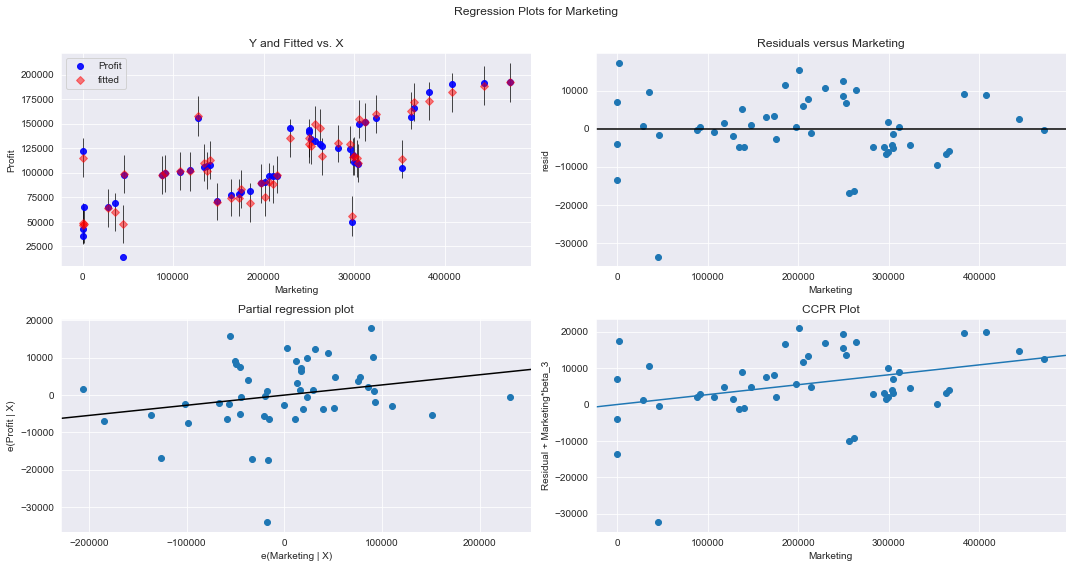

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing", fig=fig)
plt.show()

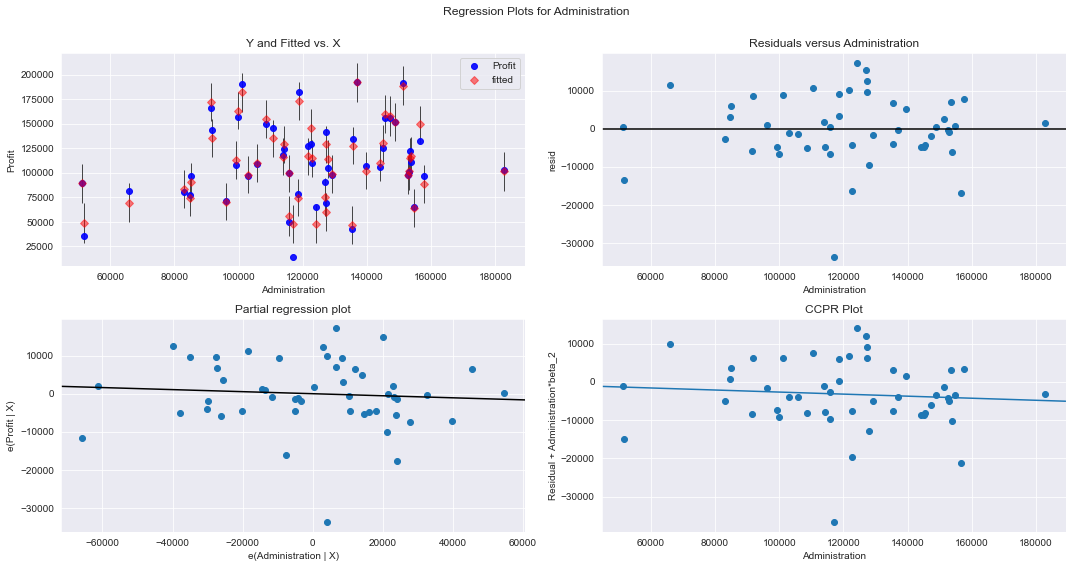

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

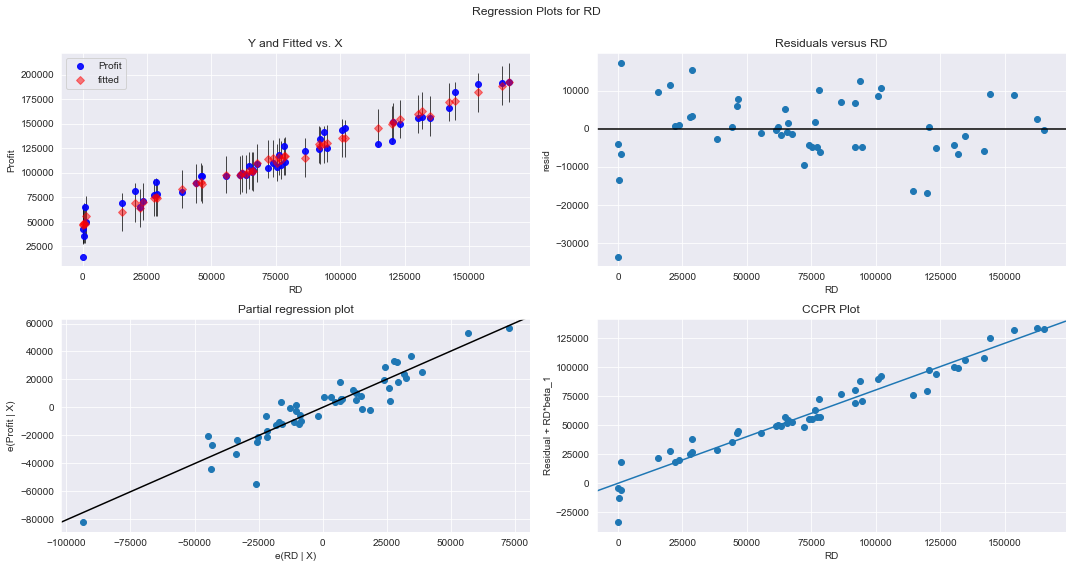

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()

# Model Deletion Diagnostics
##  1.now we will see outliers and influencers need to be removed because it will change your model so first find them using Cooks distance then remove
## 2.then we will build model with outlier and influencer and another model without them and then compare your y hat if they are big no then cooks distance will be big no too
### 3.we will remove those points those have higher cooks distance then build model and you will repeat these steps till none of records have cooks more than 0.5

### 1. Detecting Influencers/Outliers

In [28]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

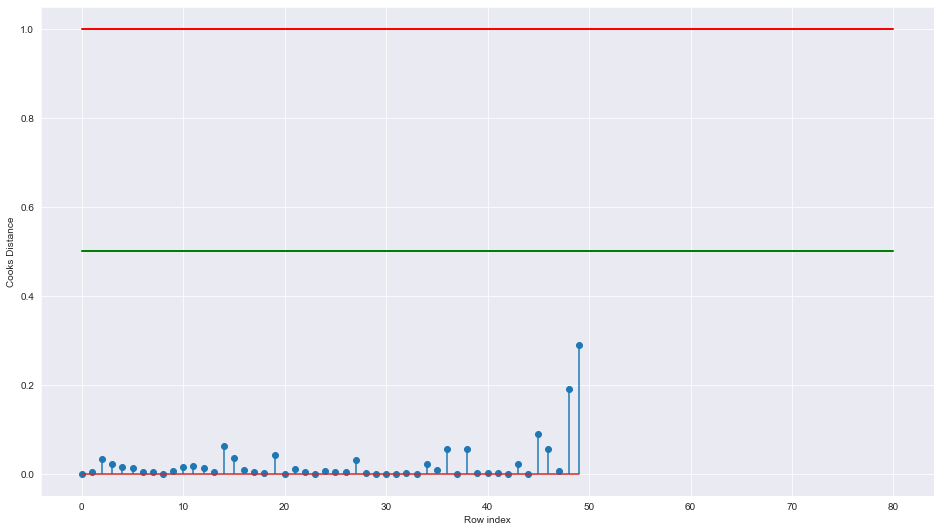

In [29]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(16,9))
x =[0,80]
y =[1.0,1.0]
plt.plot(x,y,color='red',linewidth=2)
y1 = [0.5,0.5]
plt.plot(x , y1, color = 'green',linewidth = 2)
plt.stem(np.arange(len(ds)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [30]:
k = ds.shape[1]   ## NO of columns in data set
n = ds.shape[0]   ## No of rows in data set
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

## Improving the model

In [31]:
## Load the dataset
df=pd.read_csv("50_Startups.csv")

In [32]:
df=data.rename({'Marketing Spend':'Marketing','R&D Spend':'RD'},axis=1)
df




,RD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Build Model

In [33]:
#Exclude variable "Administration" and generate R-Squared and AIC(Akaike information criteria :its measure of residual) values
final_RdM= smf.ols('Profit~RD+Marketing',data = df).fit()

### Lower value of AIC indicates the good model

In [34]:
final_RdM.rsquared,final_RdM.aic
### Above we can see rsquared value is 0.946
##so we will choose this model 

(0.9504503015559763, 1057.070772191826)

In [35]:
final_RdA= smf.ols('Profit~RD+Administration',data = df).fit()


In [36]:
final_RdA.rsquared,final_RdA.aic
### rsquared value is 0.945

(0.9478129385009173, 1059.6636934567293)

### Compairing above R-squared and aic values model Final_RdM has high rsquared and low aic values hence consider Marketing variable so that multicolinearity problem get resolved

In [37]:
model_influence_M=final_RdM.get_influence()
(c_M, _)=model_influence_M.cooks_distance

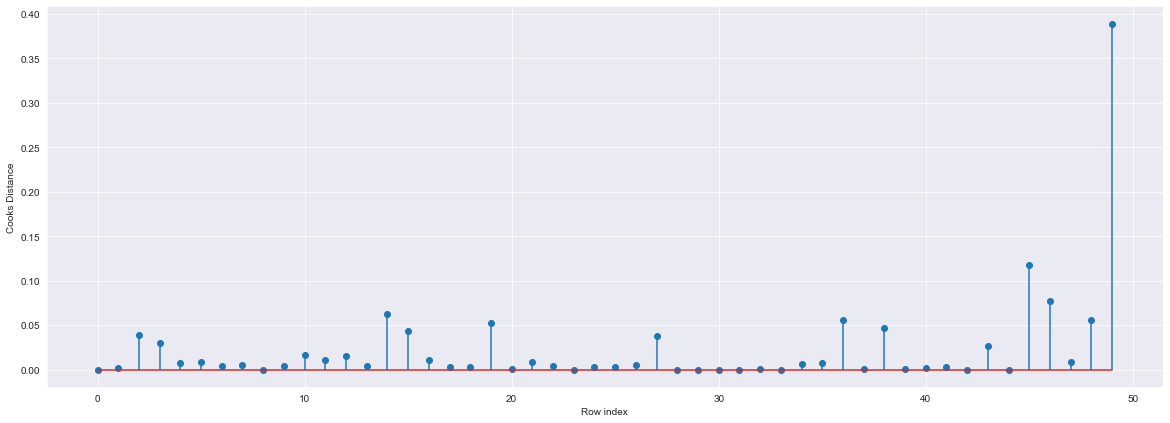

In [41]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(ds)), np.round(c_M, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [42]:
(np.argmax(c_M),np.max(c_M))

(49, 0.3894886227924922)

Since the value is <1 , we can stop the diagnostic process and finalize the model

In [43]:
## Check the Accuracy of model
final_RdM= smf.ols('Profit~RD+Marketing',data = df).fit()

In [44]:
final_RdM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           2.16e-31
Time:                        12:27:06   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RD             0.7966      0.041     19.266      0.000       0.713       0.880
Marketing      0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
(final_RdM.rsquared,final_RdM.aic)

(0.9504503015559763, 1057.070772191826)

## Predicting for new datapoints

In [46]:
## New data for predictions
new_data=pd.DataFrame({'RD':77778,"Marketing":156980},index=[1])
new_data

,RD,Marketing
1,77778,156980


In [47]:
final_RdM.predict(new_data)

1    113627.516249
dtype: float64

In [48]:
final_RdM.predict(df.iloc[0:5,])


0    192800.458625
1    189774.659480
2    181405.378097
3    173441.308842
4    171127.623218
dtype: float64

In [49]:
df.head()

,RD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [50]:
pred_y = final_RdM.predict(df)

In [51]:
pred_y

0     192800.458625
1     189774.659480
2     181405.378097
3     173441.308842
4     171127.623218
5     162879.310812
6     158028.130454
7     160455.738877
8     152317.803673
9     154343.813935
10    135011.914724
11    134638.870075
12    129218.396579
13    127812.205465
14    150192.491797
15    146032.715433
16    117025.891848
17    130829.444732
18    128882.198828
19    115816.418333
20    116650.892092
21    118384.170709
22    114990.384639
23    109886.185217
24    112552.187151
25    102612.909242
26    110990.792884
27    114978.605150
28    103125.012760
29    102440.424090
30     99085.219562
31     98314.548854
32     98864.662254
33     97600.730445
34     90262.641219
35     89776.494285
36     75824.233912
37     87974.014518
38     68631.318323
39     82924.815275
40     75049.056031
41     74113.888705
42     70234.250574
43     60390.232852
44     65489.729308
45     47829.573980
46     56909.800859
47     46975.864221
48     47407.652602
49     48326.894462
